In [1]:
import numpy as np
import pandas as pd

from py.plots.plotting import plotDiscreteMap, plotQuadrants, plotTraceDeterminant

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

ee = 0.13
ii = -0.45

In [33]:
df_show = pd.read_csv('default.csv')

/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:184: UserWarning: No contour levels were found within the data range.
  ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linestyles='dashed')
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:204: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


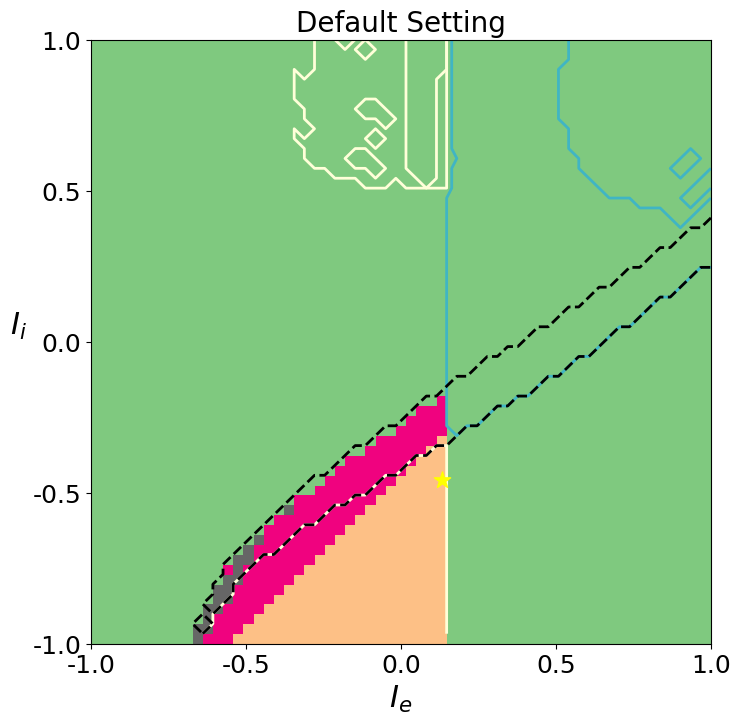

In [44]:
plotDiscreteMap(df_show, xaxis='I_e', yaxis='I_i', scatter=[0.13, -0.45], 
                title = 'Default Setting', colorbar=False)

In [43]:
df_show[df_show['p_random']==2]

,Unnamed: 0,I_e,I_i,stability,turing,turing_hopf,p_random
854,0,-0.533333,-1.000000,0,0,0,2
915,0,-0.500000,-1.000000,0,0,0,2
916,0,-0.500000,-0.966667,0,0,0,2
976,0,-0.466667,-1.000000,0,0,0,2
977,0,-0.466667,-0.966667,0,0,0,2
...,...,...,...,...,...,...,...
2090,0,0.133333,-0.466667,0,0,0,2
2091,0,0.133333,-0.433333,0,0,0,2
2092,0,0.133333,-0.400000,0,0,0,2
2093,0,0.133333,-0.366667,0,0,0,2


In [34]:
df2 = pd.read_csv('mui_05.csv')

/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:175: UserWarning: No contour levels were found within the data range.
  ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linestyles='dashed')
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:190: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


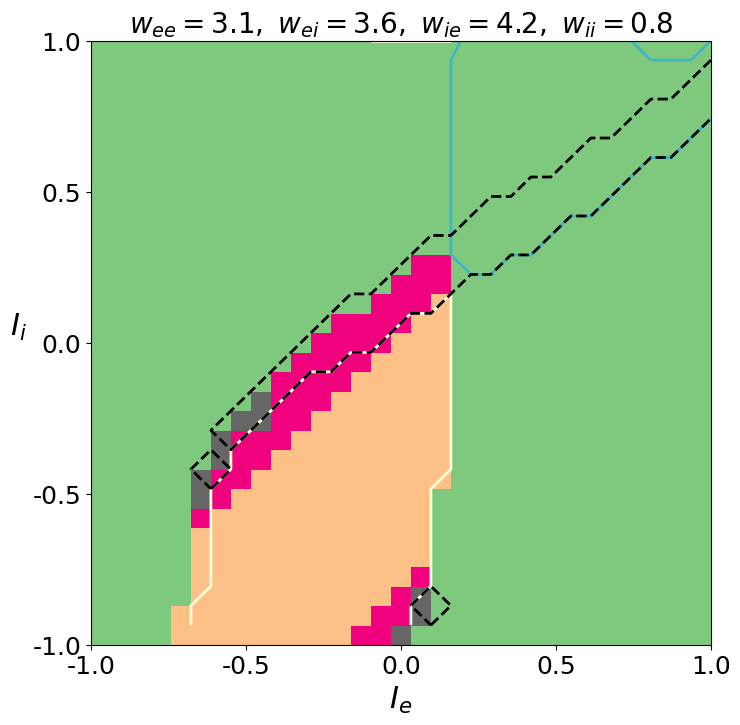

In [26]:
plotDiscreteMap(df2, title = r'$w_{ee}=3.1,\ w_{ei}=3.6,\ w_{ie}=4.2,\ w_{ii}=0.8$', colorbar=False)

In [27]:
df_show[df_show['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,turing_hopf,p_random
155,0,-0.666667,-1.000000,0,0,0,4
188,0,-0.600000,-0.866667,1,1,0,4
220,0,-0.533333,-0.800000,0,0,0,4
221,0,-0.533333,-0.733333,1,1,0,4
252,0,-0.466667,-0.733333,0,0,0,4
253,0,-0.466667,-0.666667,1,1,0,4


In [31]:
from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, a_jkValues, det, tr

ee = -0.56
ii = -0.5

params={'I_e': ee, 'I_i': ii}
ps = setParams(params)

fps = computeFPs(ps)

stab = checkFixPtsStability(fps, ps)

a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)

l=61
k = np.linspace(-2,2,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

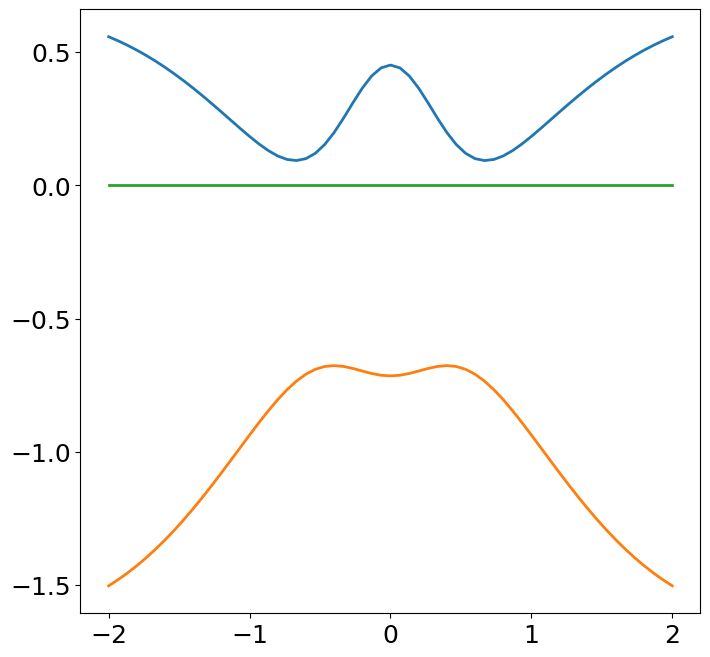

In [32]:
import matplotlib.pyplot as plt

plt.plot(k, determinant, k, trace)
plt.plot(k, zero)